Found 50154 images belonging to 2 classes.
Found 50154 images belonging to 2 classes.


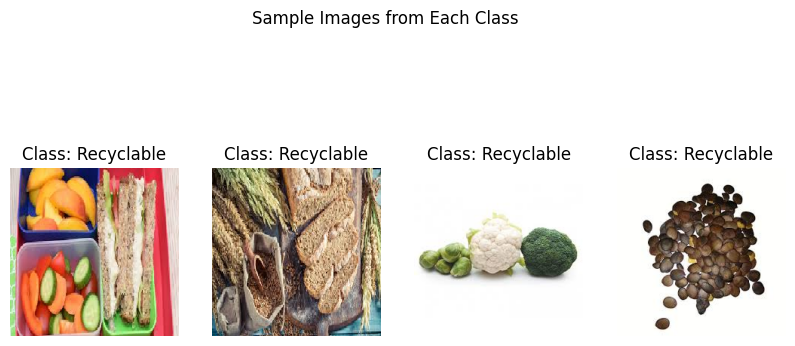

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = r"/kaggle/input/waste-classification-data/DATASET"
train_dir = r"/kaggle/input/waste-classification-data/"
test_dir = r"/kaggle/input/waste-classification-data/"


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)


plt.figure(figsize=(10, 5))
for i in range(4): 
    image, label = next(train_data)  
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()


In [22]:

mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


mobilenet_model.trainable = False  


model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)


model.save('mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)



Epoch 1/2
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 2455s 2s/step - accuracy: 0.4949 - loss: 0.7384 - val_accuracy: 0.5000 - val_loss: 0.7087
Epoch 2/2
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 2448s 2s/step - accuracy: 0.4900 - loss: 0.7169 - val_accuracy: 0.5000 - val_loss: 0.7096
 231/1568 ━━━━━━━━━━━━━━━━━━━━ 17:06 768ms/step - accuracy: 0.5012 - loss: 0.7094